In [1]:
import sympy as sp

# Define symbols
theta, phi = sp.symbols('theta phi')
r = sp.Function('r')(theta, phi)

# Define the surface parameterization
x = r * sp.sin(theta) * sp.cos(phi)
y = r * sp.sin(theta) * sp.sin(phi)
z = r * sp.cos(theta)

# Create the vector representation of the surface
R = sp.Matrix([x, y, z])

# Compute partial derivatives with respect to theta and phi
R_theta = R.diff(theta)
R_phi = R.diff(phi)

# Compute the normal vector as the cross product of R_theta and R_phi
normal = R_theta.cross(R_phi)

# Simplify the normal vector
normal_simplified = sp.simplify(normal)

# Display the result
normal_simplified

Matrix([
[(r(theta, phi)*sin(theta)**2*cos(phi) + sin(phi)*Derivative(r(theta, phi), phi) - sin(theta)*cos(phi)*cos(theta)*Derivative(r(theta, phi), theta))*r(theta, phi)],
[(r(theta, phi)*sin(phi)*sin(theta)**2 - sin(phi)*sin(theta)*cos(theta)*Derivative(r(theta, phi), theta) - cos(phi)*Derivative(r(theta, phi), phi))*r(theta, phi)],
[                                 (r(theta, phi)*sin(2*theta) - cos(2*theta)*Derivative(r(theta, phi), theta) + Derivative(r(theta, phi), theta))*r(theta, phi)/2]])

/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_73213/4209599127.py:51: RuntimeWarning: invalid value encountered in divide
  nx /= norm
/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_73213/4209599127.py:52: RuntimeWarning: invalid value encountered in divide
  ny /= norm
/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_73213/4209599127.py:53: RuntimeWarning: invalid value encountered in divide
  nz /= norm


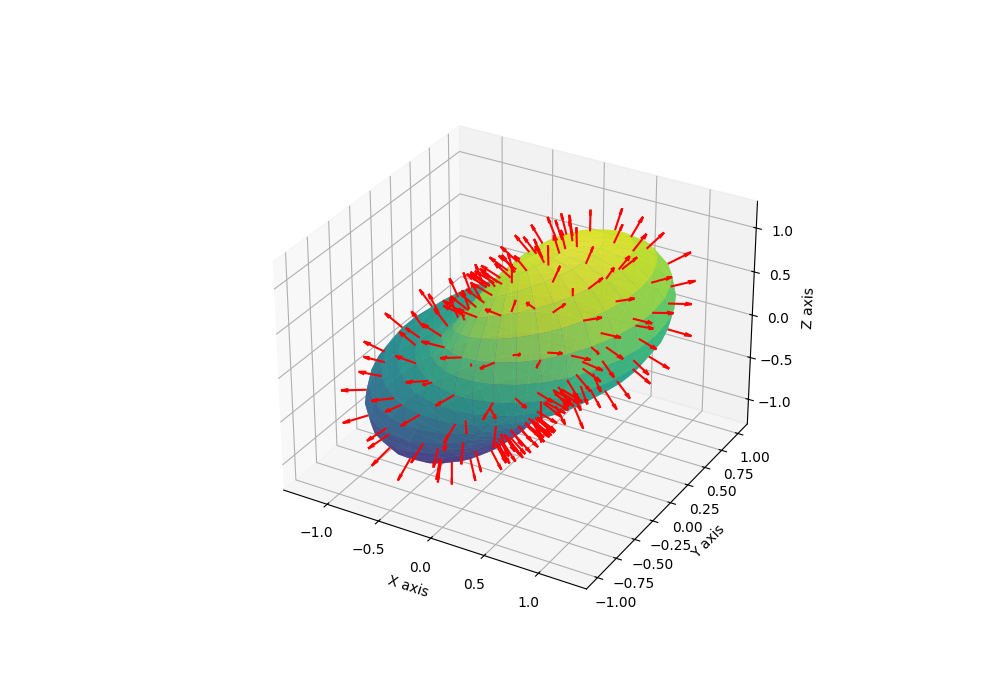

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the radial function r(theta, phi)
def r(theta, phi):
    return 1 + 0.5 * np.sin(2 * theta) * np.cos(phi)  # Example radial function

# Define the derivatives of r with respect to theta and phi
def dr_dtheta(theta, phi):
    return 0.5 * 2 * np.cos(2 * theta) * np.cos(phi)

def dr_dphi(theta, phi):
    return -0.5 * np.sin(2 * theta) * np.sin(phi)

# Generate a grid of theta and phi
theta = np.linspace(0, np.pi, 20)  # Polar angle
phi = np.linspace(0, 2 * np.pi, 40)  # Azimuthal angle
theta_grid, phi_grid = np.meshgrid(theta, phi)

# Compute the surface points
r_vals = r(theta_grid, phi_grid)
x = r_vals * np.sin(theta_grid) * np.cos(phi_grid)
y = r_vals * np.sin(theta_grid) * np.sin(phi_grid)
z = r_vals * np.cos(theta_grid)

# Compute the partial derivatives of the surface
# Partial derivative with respect to theta
x_theta = dr_dtheta(theta_grid, phi_grid) * np.sin(theta_grid) * np.cos(phi_grid) + \
          r_vals * np.cos(theta_grid) * np.cos(phi_grid)
y_theta = dr_dtheta(theta_grid, phi_grid) * np.sin(theta_grid) * np.sin(phi_grid) + \
          r_vals * np.cos(theta_grid) * np.sin(phi_grid)
z_theta = dr_dtheta(theta_grid, phi_grid) * np.cos(theta_grid) - \
          r_vals * np.sin(theta_grid)

# Partial derivative with respect to phi
x_phi = dr_dphi(theta_grid, phi_grid) * np.sin(theta_grid) * np.cos(phi_grid) - \
        r_vals * np.sin(theta_grid) * np.sin(phi_grid)
y_phi = dr_dphi(theta_grid, phi_grid) * np.sin(theta_grid) * np.sin(phi_grid) + \
        r_vals * np.sin(theta_grid) * np.cos(phi_grid)
z_phi = dr_dphi(theta_grid, phi_grid) * np.cos(theta_grid)

# Compute the cross product of the partial derivatives
nx = y_theta * z_phi - z_theta * y_phi
ny = z_theta * x_phi - x_theta * z_phi
nz = x_theta * y_phi - y_theta * x_phi

# Normalize the normal vectors
norm = np.sqrt(nx**2 + ny**2 + nz**2)
nx /= norm
ny /= norm
nz /= norm

# Plot the surface and normals
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)

# Plot the normals
step = 2  # Adjust step size to reduce the number of normals plotted
ax.quiver(x[::step, ::step], y[::step, ::step], z[::step, ::step],
          nx[::step, ::step], ny[::step, ::step], nz[::step, ::step],
          color='red', length=0.2, normalize=True)

# Set axis labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

In [7]:
nx[0]

array([        nan, -0.49488183, -0.21086946,  0.12769537,  0.47725377,
        0.77188123,  0.95237838,  0.99892447,  0.93245004,  0.79220535,
        0.61838131,  0.44927223,  0.33119368,  0.34700735,  0.61595772,
        0.89390059,  0.94926841,  0.92496499,  0.84753357,  0.70710678])